In [19]:
using StaticArrays, DifferentialEquations, DynamicalSystems, BenchmarkTools, CairoMakie

In [143]:
function model(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp(-50*(y-ythr)) )
    σ(x) = 1 / ( 1 + exp(-20*(x-xthr)) )
    
    E, x, y = u
    α, τ, τD, τy, J, U0, ΔU0, β, xthr, ythr, I0 = p
    
    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    
    return SVector(du1, du2, du3)
end;

In [425]:
function model!(du, u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp(-50*(y-ythr)) )
    σ(x) = 1 / ( 1 + exp(-20*(x-xthr)) )
    
    E, x, y = u
    α, τ, τD, τy, J, U0, ΔU0, β, xthr, ythr, I0 = p
    
    du[1] = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du[2] = (1-x)/τD - U(y)*x*E
    du[3] = (-y)/τy+β*σ(x)
end;

In [450]:
τ = 0.013; τD = 0.15; τy = 1.8;
J = 3.07; β = 0.4375;

In [574]:
xthr = 0.9; ythr = 0.5
U0 = 0.473; ΔU0 = 0.305
α = 1.15; I0 = -0.70;

u0 = sol[end] # [1.11, 0.988967, 0.4861];
p = [α, τ, τD, τy, J, U0, ΔU0, β, xthr, ythr, I0]
tspan = (0.0, 250.0)

prob = ODEProblem(model!, u0, tspan, p);

In [534]:
# condition from limit ContinuousDynamicalSystem
sol[end]

3-element Vector{Float64}:
 2.0227952249622656
 0.8506483881721529
 0.13202338304404765

In [575]:
sol = solve(prob, RK4(), adaptive = false, dt = 0.001);

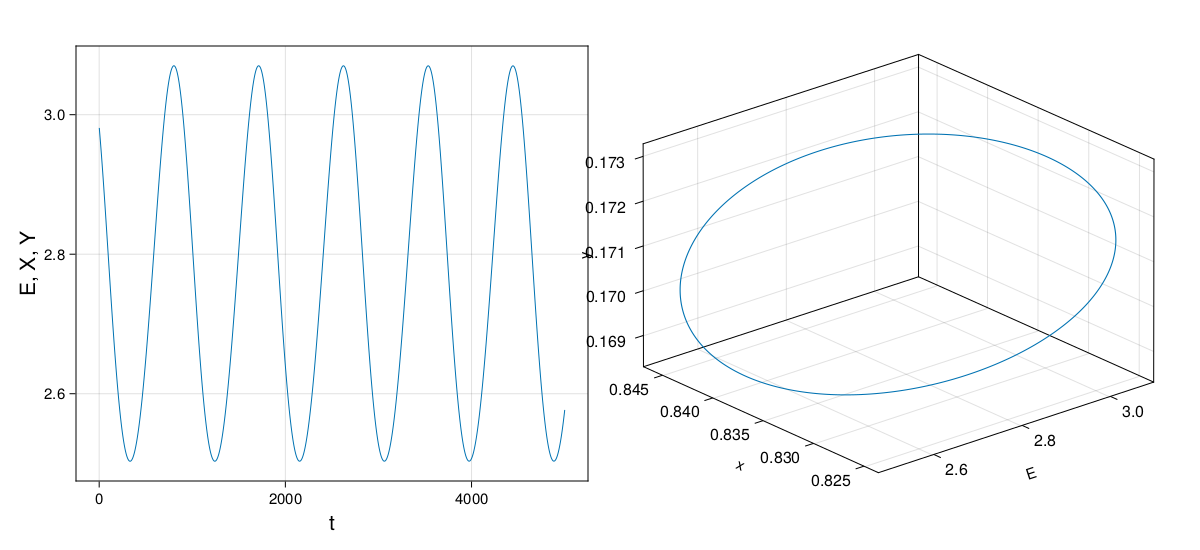

In [576]:
ts = 90000; tf = 95000
f = Figure(resolution = (1200, 550))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "E, X, Y", xlabelsize = 21, ylabelsize = 21,xticklabelsize = 15, yticklabelsize = 15)
axis3 = Axis3(f[1, 2], xlabel = "E", ylabel = "x", zlabel = "y", xlabelsize = 15, ylabelsize = 15, zlabelsize = 15)

lines!(axis3, sol[1, ts:tf], sol[2, ts:tf], sol[3, ts:tf], linewidth = 1.0)
lines!(axis, sol[1, ts:tf], linewidth = 1.0)
f